# <span style="color:blue">  Numerical exercises 8</span> Igor Vasiljevic 11191A

## Simulated Annealing is a optimization algorithm. The algorithm starts with initial parameters and iteratively explores the parameters space with MC steps that use $e^(\left( \frac{{\text{{OldEnergy}} - \text{{newEnergy}}}}{{\text{{temperature}}} } \right))$. The algorithm starts with high temperature value. As the algorithm progresses, the temperature is reduced by a cooling law and controls the randomness of the move in attempt to explore more of the parameter space. 
## Initially, at higher temperatures, the algorithm is more likely to accept worse solutions to avoid getting trapped in local optima. As the temperature decreases, the acceptance probability decreases, favoring only better solutions. The cooling rate determines how fast the temperature decreases.


## Here the results for 1D quantum model with potential

In [197]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

plt.rcParams.update({'font.size': 20})

M=10000              # Total number of throws
N=100             # Number of blocks
L=int(M/N)
x1 = np.arange(N)
x1*=L # Number of throws = block * (Number of throws in each block)

data1 = pd.read_csv('../Esercizio8/datiEnergy.dat', sep='\s+', header=None, names=['values','error'])

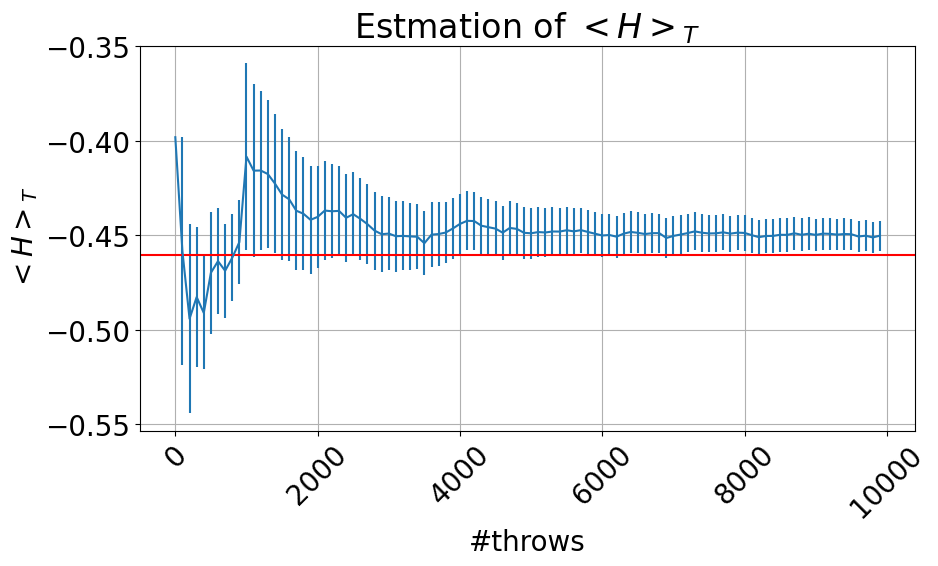

In [198]:
plt.errorbar(x1,data1["values"],yerr=data1["error"])
plt.axhline(y=-0.46046587969271513, color='r', linestyle='-') #Analytic solution
plt.rcParams["figure.figsize"]=(10,5)
plt.title('Estmation of $<H>_{T}$')
plt.xlabel('#throws')
plt.xticks(rotation = 45)
plt.ylabel('$<H>_{T}$')
plt.grid(True)
plt.show()

## Using the best values of $\sigma$=-0.611876 and $\mu$=-0.792729, the metropolis values seams to be statisticly close to true values. The output of the code gives the best energy -0.453339

In [199]:
T=10000
x2 = np.arange(T)

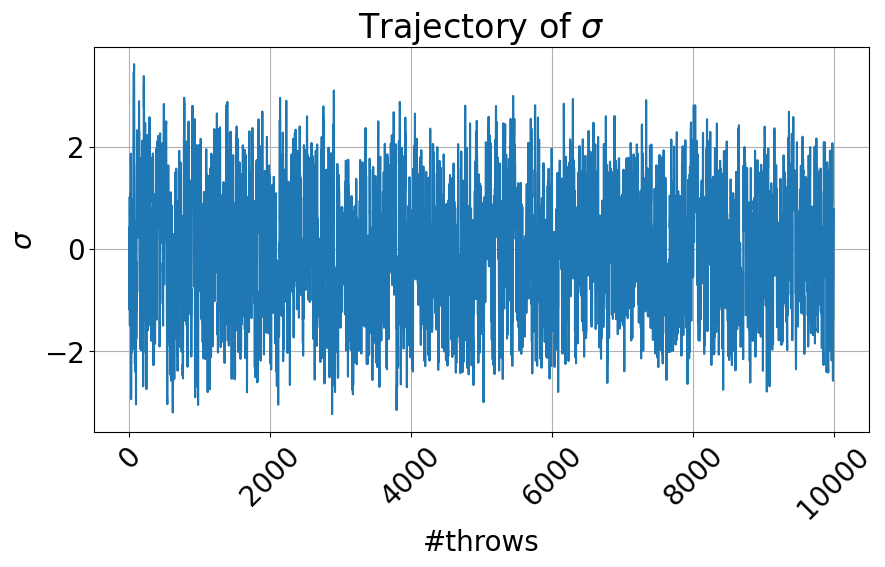

In [200]:
data3 = pd.read_csv('../Esercizio8/datiSigmaTraj.dat', sep='\s+', header=None, names=['values'])
plt.plot(x2, data3["values"])
plt.title('Trajectory of $\sigma$')
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('#throws')
plt.xticks(rotation = 45)
plt.ylabel('$\sigma$')
plt.grid(True)
plt.show()

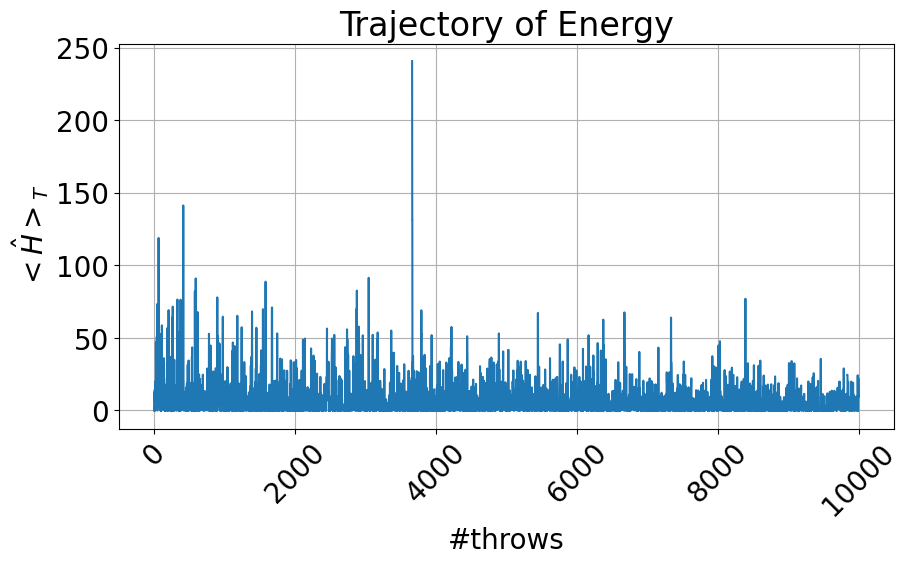

In [209]:
data4 = pd.read_csv('../Esercizio8/datiEnergyTraj.dat', sep='\s+', header=None, names=['values'])
plt.plot(x2, data4["values"])
plt.title('Trajectory of Energy')
plt.xticks(rotation = 45)
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('#throws')
plt.ylabel('$<{\hat H}>_T$')
plt.grid(True)
plt.show()

In [202]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [203]:
plt.rcParams.update({'font.size': 20})
datiAnalytic = pd.read_csv('../Esercizio8/analyic.dat', sep='\s+', header=None, names=['x', 'psi'])
datiHisto=pd.read_csv('../Esercizio8/histo.dat', sep='\s+', header=None, names=['xbin', 'psi'])
datiMat=pd.read_csv('../Esercizio8/matValues.dat', sep='\s+', header=None, names=['x', 'psi'])

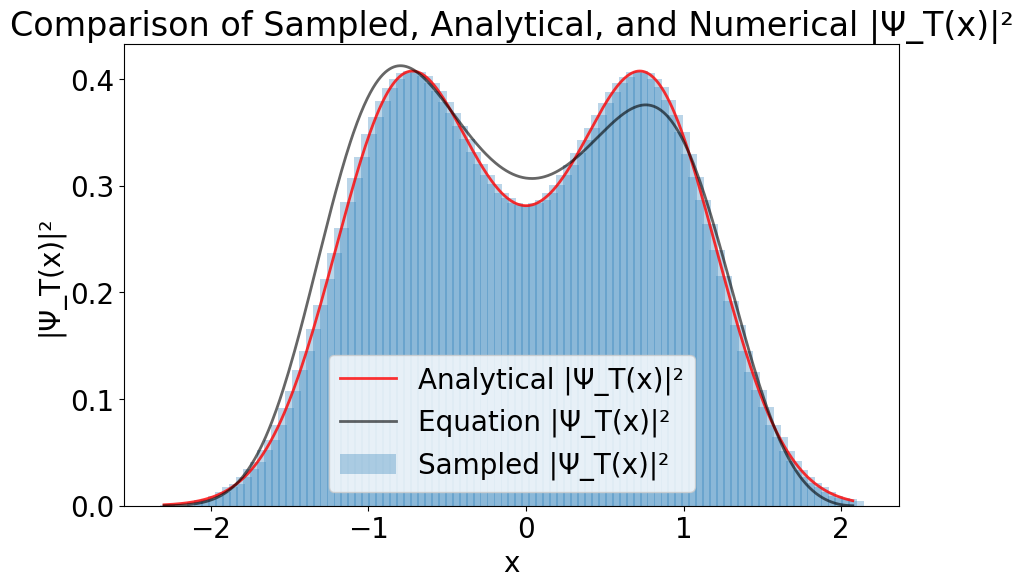

In [205]:
# Plot the sampled histogram, analytical curve, and numerical solution
plt.figure(figsize=(10, 6))

# Plot the sampled histogram
plt.bar(datiHisto['xbin'],datiHisto['psi'], width=0.1, alpha=0.3, label="Sampled |Ψ_T(x)|²")

# Plot the analytical curve
plt.plot(datiAnalytic['x'],datiAnalytic['psi'], linewidth=2, alpha=0.8, color='r', label="Analytical |Ψ_T(x)|²")
plt.plot(datiMat['x'],datiMat['psi'], linewidth=2, alpha=0.6, color='black', label="Equation |Ψ_T(x)|²")
# Set the plot title and labels
plt.title("Comparison of Sampled, Analytical, and Numerical |Ψ_T(x)|²")
plt.xlabel("x")
plt.ylabel("|Ψ_T(x)|²")
plt.legend()
plt.show()

## The matrix quantum equation solution (the black line in plot) should be simmetric. 

### Exercise 08.1

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.


Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>

- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

Ground state energy:  -0.46046587969271524
1st excited state energy:  0.09742471331761163
2nd excited state energy:  1.9717331343930202


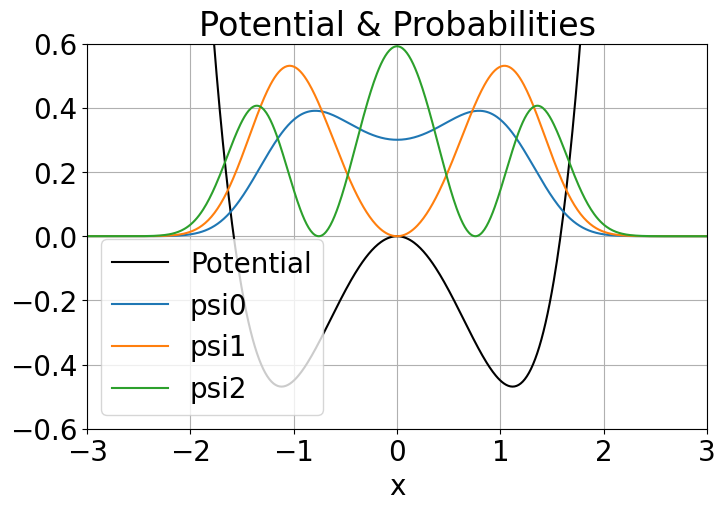

In [210]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label="psi0")
plt.plot(x,(psi[1])**2, label="psi1")
plt.plot(x,(psi[2])**2, label="psi2")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.legend()
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

### <span style="color:green">Supplementary material</span>
-produce data in a file "psi.dad"show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).


How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.